In [2]:
import numpy as np
import pandas as pd
from joblib import dump,load

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#naive Bayes approach
from sklearn.naive_bayes import MultinomialNB

#trees approach
from sklearn.tree import DecisionTreeClassifier

# Ensemble Approach
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train_data_path = "D:/Disease-Prediction-from-Symptoms/dataset/training_data.csv"
test_data_path = "D:/Disease-Prediction-from-Symptoms/dataset/test_data.csv"

In [10]:
train = pd.read_csv(train_data_path)

In [11]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [17]:
#feature and lable separation
features = train.columns[:-2]
train_x = train[features]
train_y = train['prognosis']

print(len(train_x.columns))

132


In [35]:
for i in train_x.columns:
    with open('D:/Downloads/symptomes.txt', 'a') as f:
        f.write(str(i) + "\n")

In [16]:
test = pd.read_csv(test_data_path)

In [18]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [19]:
test_x = test[test.columns[:-1]]
test_y = test['prognosis']

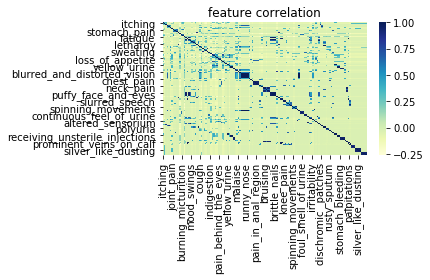

In [20]:
corr = train_x.corr()
sns.heatmap(corr, annot = False, cmap="YlGnBu")
plt.title("feature correlation")
plt.tight_layout()
plt.show()

In [21]:
train_x,val_x,train_y,val_y = train_test_split(train_x, train_y, test_size = 0.2, shuffle = True, random_state = 42)

In [25]:
#decision tree classifier training
type = ['gini', 'entropy']
for t in type:
    clf = DecisionTreeClassifier(criterion = t)
    clf.fit(train_x,train_y)
    
    score = clf.score(val_x, val_y)
    
    print(f"cross validation score = {score}")
    y_pred = clf.predict(val_x)
    acc = accuracy_score(val_y,y_pred)
    
    print(f"accuracy on validation set = {acc}")
    conf_mat = confusion_matrix(val_y, y_pred)
    
    cls = classification_report(val_y, y_pred)
    
    print(cls)
    
    dump(cls,"D:/Downloads/" + str(t) + ".joblib")

cross validation score = 1.0
accuracy on validation set = 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       